In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#Read in the data
df = pd.read_csv(r'/Users/rasheedatolaiya/Downloads/movies.csv')

In [3]:
#Looking into the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#Checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Remove rows with non-numeric values in 'budget' and 'gross' columns

df = df[pd.to_numeric(df['budget'], errors='coerce').notna()]
df = df[pd.to_numeric(df['gross'], errors='coerce').notna()]

In [7]:
#Changing column data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5436 rows x 15 columns]

In [8]:
#creating a column for correct year
df['correctyear'] = df['released'].astype(str).str[:3]
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime correctyear  
0                            Warner Bros.    146.0         Jun  
1                       Columbia Pictures    104.0         Jul  
2                               Lucasfilm    124.0         Jun  
3                      Paramount Pictures     88.0         Jul  
4                          Orion Pictures     98.0         Jul  
...                                   ...      ...         ...  
7648                    Columbia Pictures    124.0         Jan  
7649                   Paramount Pictures     99.0         Feb  
7650                   Universal Pictures    101.0         Jan  
7651                 20th Century Studios    100.0         Feb  
7652  Beijing Diqi Yinxiang Entertainment    149.0         Aug  

[5436 rows x 16 columns]

In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes          director  \
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
...                                 ...    ...        ...               ...   
2434         June 4, 1994 (South Korea)    4.5     1900.0  Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000.0      John Fawcett   
272      March 12, 1982 (United States)    3.9     2300.0      Charles Band   
2417             April 17, 1993 (Japan)    7.3     5100.0    Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0      George Huang   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
2434  Wallace C. Bennett       Brad Johnson  United States    5000000   
3681        Karen Walton      Emily Perkins         Canada    5000000   
272        Alan J. Adler    Robert Glaudini  United States     800000   
2417        Ishirô Honda   Tatsuo Matsumura          Japan   11900000   
3203           Andy Burg       Will Friedle  United States   15000000   

           gross                         company  runtime correctyear  
5445  2847246203           Twentieth Century Fox    162.0         Dec  
7445  2797501328                  Marvel Studios    181.0         Apr  
3045  2201647264           Twentieth Century Fox    194.0         Dec  
6663  2069521700                       Lucasfilm    138.0         Dec  
7244  2048359754                  Marvel Studios    149.0         Apr  
...          ...                             ...      ...         ...  
2434        2970                Trimark Pictures     97.0         Jun  
3681        2554       Copperheart Entertainment    108.0         May  
272         2270                Embassy Pictures     85.0         Mar  
2417         596  DENTSU Music And Entertainment    134.0         Apr  
3203         309                        Daybreak     85.0         Oct  

[5436 rows x 16 columns]

In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes          director  \
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
...                                 ...    ...        ...               ...   
2434         June 4, 1994 (South Korea)    4.5     1900.0  Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000.0      John Fawcett   
272      March 12, 1982 (United States)    3.9     2300.0      Charles Band   
2417             April 17, 1993 (Japan)    7.3     5100.0    Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0      George Huang   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
2434  Wallace C. Bennett       Brad Johnson  United States    5000000   
3681        Karen Walton      Emily Perkins         Canada    5000000   
272        Alan J. Adler    Robert Glaudini  United States     800000   
2417        Ishirô Honda   Tatsuo Matsumura          Japan   11900000   
3203           Andy Burg       Will Friedle  United States   15000000   

           gross                         company  runtime correctyear  
5445  2847246203           Twentieth Century Fox    162.0         Dec  
7445  2797501328                  Marvel Studios    181.0         Apr  
3045  2201647264           Twentieth Century Fox    194.0         Dec  
6663  2069521700                       Lucasfilm    138.0         Dec  
7244  2048359754                  Marvel Studios    149.0         Apr  
...          ...                             ...      ...         ...  
2434        2970                Trimark Pictures     97.0         Jun  
3681        2554       Copperheart Entertainment    108.0         May  
272         2270                Embassy Pictures     85.0         Mar  
2417         596  DENTSU Music And Entertainment    134.0         Apr  
3203         309                        Daybreak     85.0         Oct  

[5436 rows x 16 columns]

In [11]:
pd.set_option('display.max_rows', None)

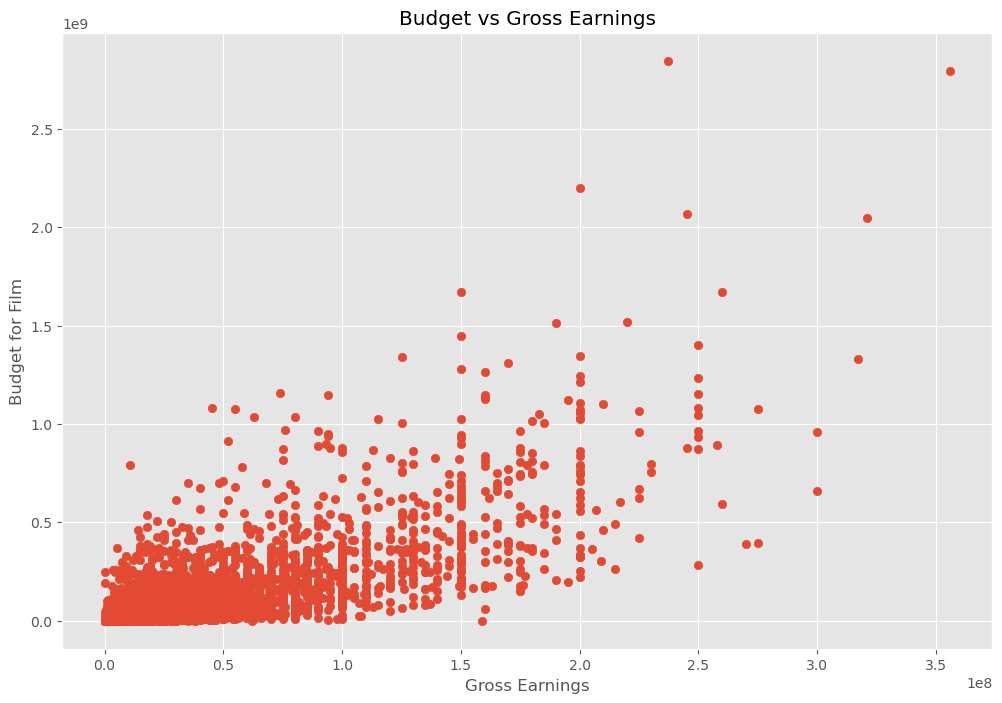

In [12]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

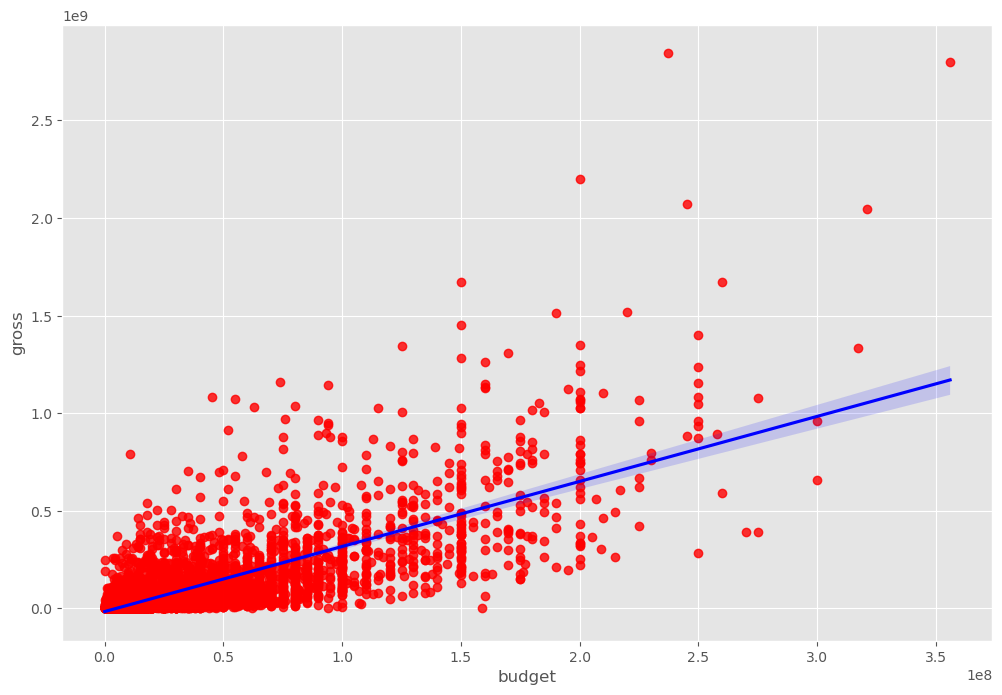

In [13]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [14]:
#Pearson Correlation

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

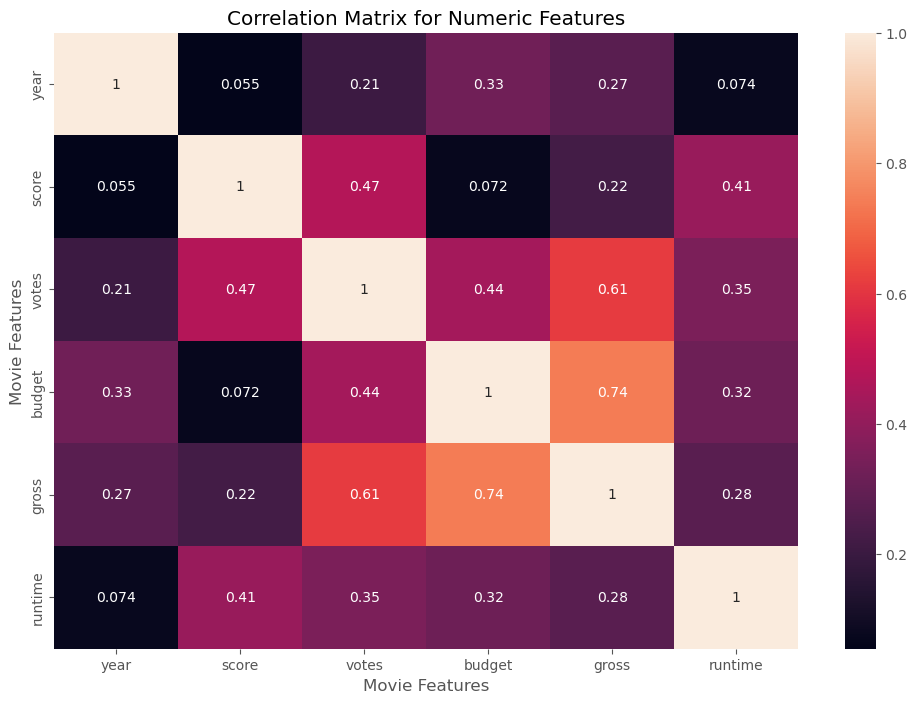

In [16]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1     3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2     3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3      205       4      4  1980      1131    7.7   221000.0       891    1416   
4      734       6      4  1980      1174    7.3   108000.0       721     352   
5     1513       6      9  1980      1928    6.4   123000.0      1763    3091   
6     3944       6      0  1980      1363    7.9   188000.0       976     578   
7     3134       6      3  1980       531    8.2   330000.0      1272    1259   
8     3745       4      0  1980      1350    6.8   101000.0      1611    1405   
9     4415       6      3  1980      1760    7.0    10000.0      2017     281   
10     333       4      0  1980       511    6.1    18000.0       238    2819   
11    4193       4      1  1980      2278    7.3    54000.0       819    1302   
12    3041       4      1  1980       472    5.3    30000.0      1648    1662   
13    2871       6      6  1980      2422    7.7    49000.0      1671    1657   
14    1211       6      5  1980      1174    7.1    37000.0       208     351   
15    3566       4      6  1980      2300    7.2    27000.0       849    2514   
17      67       4      4  1980       531    6.9    29000.0       335    2322   
18    4157       6      9  1980       835    6.8    66000.0       945    1489   
20     989       6      5  1980       716    6.5    20000.0      2038    3161   
21    1768       6      1  1980       118    6.8    14000.0      1310    2070   
22    4142       4      0  1980       214    6.7    22000.0       504    2969   
23    5303       4      8  1980       438    5.3    12000.0      1659    2499   
28     702       6      5  1980      1363    7.2    17000.0      1875    3109   
29     262       6      5  1980       669    6.2    22000.0      1492    2365   
33     787       4      6  1980       118    6.1      604.0      1148     675   
35    3080       6      4  1980      2162    6.2    24000.0       746    2213   
36    4259       6      4  1980      1888    6.3     4300.0       583     968   
37    2628       6      4  1980      2263    6.0    11000.0      1118    2585   
42    4750       6      0  1980      1417    7.1     9000.0      1618    1806   
46    4326       6      0  1980      1308    5.3     3900.0      1340    2390   
48    4526       4      0  1980      1928    5.1     3100.0       331    2041   
50    3661       4      4  1980      2482    7.3    22000.0      2049    3194   
51    2506       6      4  1980      2422    6.8     4500.0      1027     304   
53     693       4      0  1980      1293    6.1    11000.0       329     770   
56    5207       4      0  1980      1634    4.6     2600.0       795    1080   
57    2829       4      4  1980      1055    5.4     2400.0       916    2630   
58    4533       6      0  1980       262    5.1     5200.0       553    1823   
75    4365       1      1  1980      1403    5.8     1300.0       269     941   
77    5254       6      4  1980       262    5.9      415.0      1487    1342   
80    2983       6      6  1980      2557    4.0      546.0       971    1016   
92    1980       4      0  1981      1300    8.4   905000.0      1864    1810   
94     285       6      4  1981       315    7.5    97000.0       976    1527   
95    1304       6      0  1981      1044    7.2   131000.0       945    1489   
96    4114       2      9  1981        46    7.5   192000.0      1740    2715   
97    3043       6      4  1981      1573    6.2    40000.0       178     308   
98     604       6      5  1981      1166    7.4    47000.0       208     351   
99     863       4      0  1981      1300    6.9    42000.0       480     278   
100   1332       6      1  1981        11    7.4    59000.0       939    2973   
101   2397       6      0  1981      

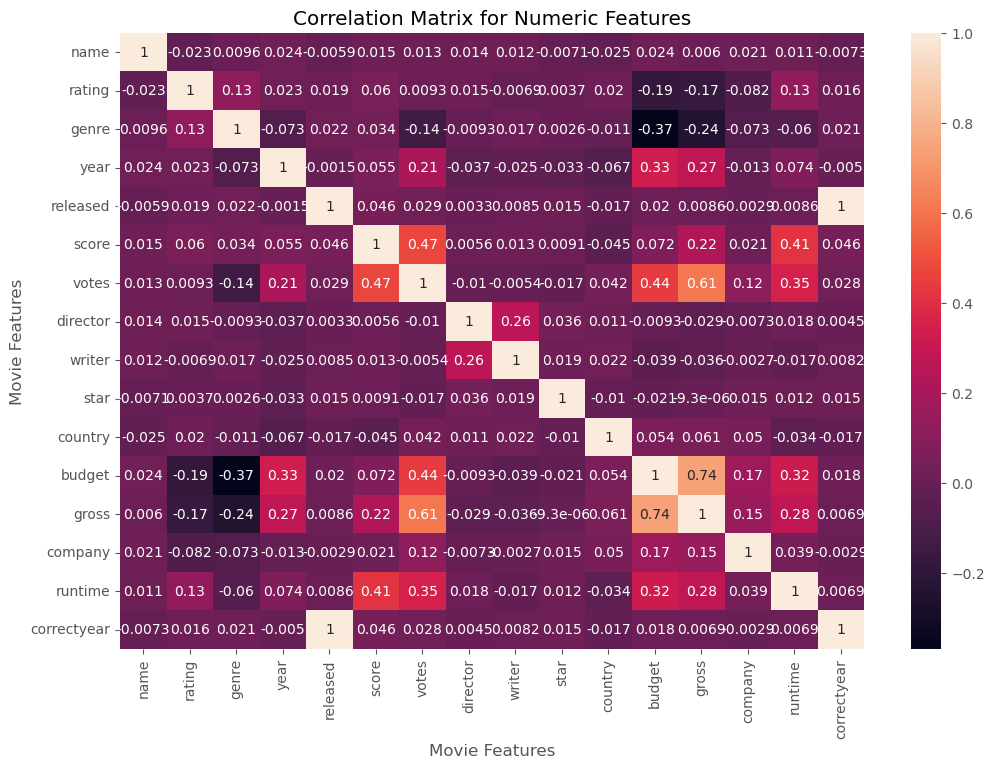

In [18]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.023013  0.009617  0.024435 -0.005896  0.014955   
rating      -0.023013  1.000000  0.128102  0.022668  0.018836  0.059550   
genre        0.009617  0.128102  1.000000 -0.073026  0.021712  0.034061   
year         0.024435  0.022668 -0.073026  1.000000 -0.001481  0.055174   
released    -0.005896  0.018836  0.021712 -0.001481  1.000000  0.046424   
score        0.014955  0.059550  0.034061  0.055174  0.046424  1.000000   
votes        0.012915  0.009255 -0.136457  0.205758  0.029029  0.473809   
director     0.013699  0.014847 -0.009303 -0.036936  0.003341  0.005573   
writer       0.011602 -0.006923  0.017500 -0.024568  0.008514  0.012860   
star        -0.007109  0.003737  0.002619 -0.032770  0.015363  0.009121   
country     -0.024555  0.020148 -0.010847 -0.066662 -0.017231 -0.044690   
budget       0.023698 -0.186892 -0.368900  0.327781  0.019888  0.071792   
gross        0.005966 -0.168814 -0.244380  0.274264  0.008614  0.222143   
company      0.021209 -0.082189 -0.073293 -0.013062 -0.002927  0.021054   
runtime      0.010800  0.133239 -0.060186  0.074203  0.008619  0.414580   
correctyear -0.007299  0.016131  0.021145 -0.005001  0.996339  0.045536   

                votes  director    writer      star   country    budget  \
name         0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating       0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre       -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year         0.205758 -0.036936 -0.024568 -0.032770 -0.066662  0.327781   
released     0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score        0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes        1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director    -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer      -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star        -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country      0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget       0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross        0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company      0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime      0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   
correctyear  0.027633  0.004539  0.008244  0.014616 -0.016894  0.018172   

                gross   company   runtime  correctyear  
name         0.005966  0.021209  0.010800    -0.007299  
rating      -0.168814 -0.082189  0.133239     0.016131  
genre       -0.244380 -0.073293 -0.060186     0.021145  
year         0.274264 -0.013062  0.074203    -0.005001  
released     0.008614 -0.002927  0.008619     0.996339  
score        0.222143  0.021054  0.414580     0.045536  
votes        0.614904  0.119366  0.352437     0.027633  
director    -0.029366 -0.007337  0.018082     0.004539  
writer      -0.035999 -0.002658 -0.016672     0.008244  
star        -0.000009  0.015086  0.012439     0.014616  
country      0.060929  0.049559 -0.033554    -0.016894  
budget       0.740395  0.171385  0.318595     0.018172  
gross        1.000000  0.150233  0.275596     0.006889  
company      0.150233  1.000000  0.038752    -0.002940  
runtime      0.275596  0.038752  1.000000     0.006851  
correctyear  0.006889 -0.002940  0.006851     1.000000

In [21]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             correctyear   -0.007299
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
rating       company       -0.082189
company      rating        -0.082189
genre        company       -0.073293
company      genre         -0.073293
year         genre         -0.073026
genre        year          -0.073026
country      year          -0.066662
year         country       -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
score        country       -0.044690
country      score         -0.044690
writer       budget        -0.039420
budget       writer        -0.039420
year         director      -0.036936
director     year          -0.036936
writer       gross         -0.035999
g

In [23]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
released     correctyear    0.996339
correctyear  released       0.996339
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
#Comppany has high correlation